In [1]:
# 统计Python练习项目中保留关键字频度
import os
import re
from keyword import kwlist
root = "../"
kwdict = {}
po = re.compile(r"\W+")    # 非单词类字符


def main():
    for folder, subfolder, files in os.walk(root):
        for file in files:
            if file.endswith((".py", ".pyw")):
                with open(os.path.join(folder, file), encoding="utf-8") as f:
                    for line in f:
                        line = po.sub(" ", line)   # 清理非单词类字符
                        for word in line.split():  # 文本拆分为单词
                            if word in kwlist:     # 如为关键字则更新结果字典
                                kwdict.setdefault(word, 0)
                                kwdict[word] += 1
    # 排序输出关键字频度
    result = sorted(kwdict.items(), key=lambda i: i[1], reverse=True)
    cnt = 0
    for k, v in result:
        print(f"{k:>8} {v:3}", end=" ")
        if cnt % 5 == 4:
            print()
        cnt += 1


if __name__ == "__main__":
    main()

     def 153   import 147       if 136       in  82      for  77 
    from  59       as  56     True  54   return  35    False  26 
    None  26   lambda  26    class  23    while  21     elif  21 
     and  18      not  15     else  15     with  14       is  12 
  except  10       or   9      try   8    break   6 continue   3 
nonlocal   3    raise   2  finally   2    async   2    await   2 
  global   1     pass   1    yield   1   assert   1 

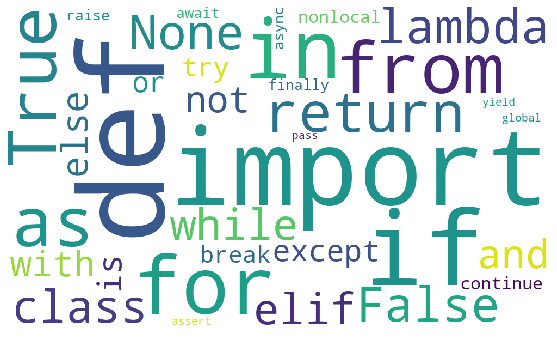

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # 词云第三方包
%matplotlib inline
# 根据关键字频度生成词云图
wc = WordCloud(background_color="white", width=1000, height=600)
wc.generate_from_frequencies(kwdict)
plt.figure(figsize=(10, 6))
plt.axis("off")
plt.imshow(wc);